In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# Lectura de datos

In [3]:
housing_df = pd.read_csv('housing.csv')

# Vistazo rápido a los atributos

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* La columna total_debrooms es la única que contiene valores nulos
* La columna ocean_proximity es la única no numérica, por lo que vamos a ver sus posibles valores

In [6]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Por tanto, se trata de una variable categórica. Para los atributos numéricos se puede utilizar el método describe() que nos da más información sobre los mismos.

In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


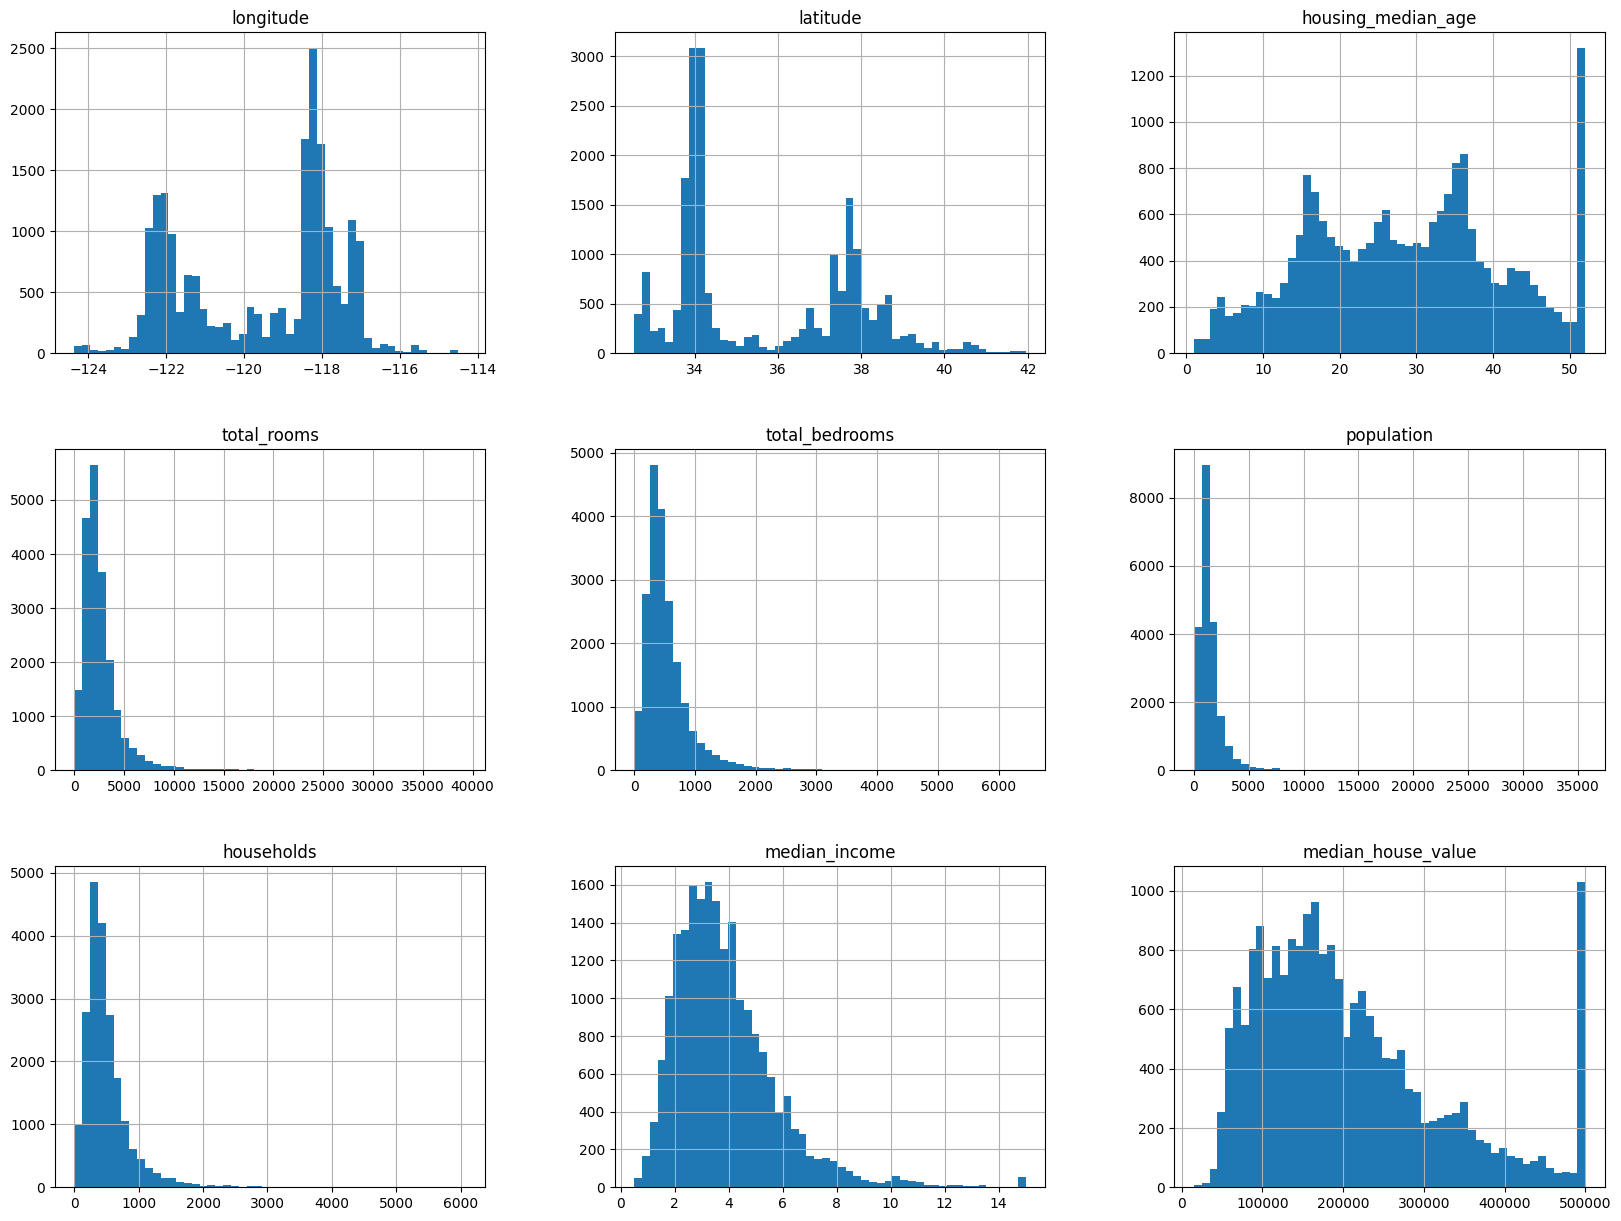

In [10]:
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

De los histogrmas de estas variables se puede sacar mucha información:

* La escala de mendian_income no parece estar directamente en dollares ya que los valores van de 0 a 15 aproximadamente. Tras consuktar la documentación del dataset se observa que los datos de este atributo está medido en miles de dolares y que los valores han sido truncados a la escala (0.49999..., 15)

* Las columnas median_house_age y median_house_value, tienen una gran cantidad de registros con valor 50 y 500000 respectivamente. Si observamos la documentación de este dataset, podemos observar que ambos atributos estan en realidad truncados, de tal forma que se incluían dentro de dichos valores todos los registros cuyo valor superaba el límite.

* Para la mayoría de columnas, el histograma hace una cola desplazada a la izquierda.

# Separación en conjuntos de train y test

Para la división en trein y test usaremos la regla de Pareto (80-20) y, como la variable objetivo se ajusta más o menos a una distribución normal, no es necesario hacer un split estratificado.

In [12]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

print(f"Training set: {train_set.shape}")
print(f"Test set: {test_set.shape}")

Training set: (16512, 10)
Test set: (4128, 10)


# Visualización de los datos para ganar información

## Datos geográficos

Vamos a empezar graficando los puntos geográficos que se corresponden con las ubicaciones de cada casa. Además vamos a crear una escala de color para el precio de cada casa, de tal forma que se pueda observar si existe alguna relación entre la ubicación de una casa y su precio

<Axes: xlabel='longitude', ylabel='latitude'>

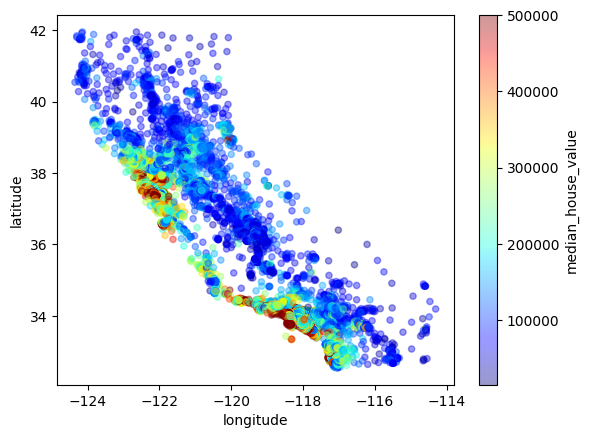

In [16]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

Si que parece que la ubicación de una casa está bastante relacionada con el precio de la misma, siendo más caras aquellas cercanas a la costa que las del interior

## Correlaciones

In [22]:
numerics = housing_df.select_dtypes(include=[np.number])
corr_matrix = numerics.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Parece ser que el ingreso promedio está bastante correlacioando con el valor de una casa. 

A continuación vamos a buscar las correlaciones más altas entre pares de atributos para ver si existen atributos que en realidad están haciendo referencia a la misma información

Top 10 highest correlated attribute pairs:
households and total_bedrooms: 0.9797
total_bedrooms and households: 0.9797
total_rooms and total_bedrooms: 0.9304
total_bedrooms and total_rooms: 0.9304
longitude and latitude: 0.9247
latitude and longitude: 0.9247
total_rooms and households: 0.9185
households and total_rooms: 0.9185
households and population: 0.9072
population and households: 0.9072


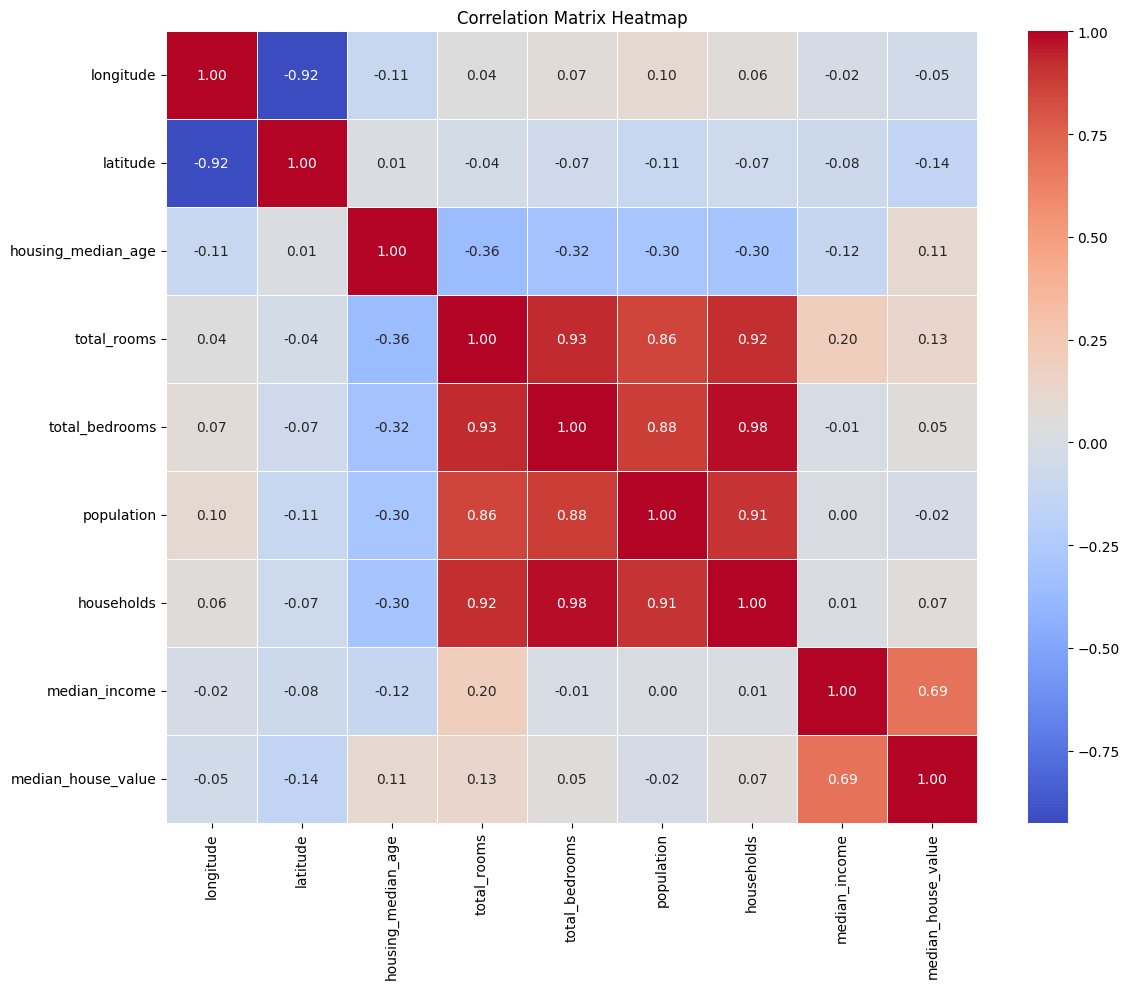

In [ ]:
corr_abs = corr_matrix.abs().unstack()
corr_abs = corr_abs[corr_abs < 1]
high_correlations = corr_abs.sort_values(ascending=False)

top_10_correlations = high_correlations[:10]
print("Top 10 highest correlated attribute pairs:")
for idx, val in top_10_correlations.items():
    print(f"{idx[0]} and {idx[1]}: {val:.4f}")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Se puede observar que el número de habitaciones, numero de dormitorios, población en el bloque censal y número de hogares están muy correlacionados entre sí.

## Probando combinaciones de atributos

A continuación vamos a probar varias combinaciones de atributos para observar si estas nuevas combinaciones están correlacionadas con la variable objetivo.

In [25]:
rooms_per_household = housing_df["total_rooms"] / housing_df["households"]
housing_df["rooms_per_household"] = rooms_per_household
bedrooms_per_room = housing_df["total_bedrooms"] / housing_df["total_rooms"]
housing_df["bedrooms_per_room"] = bedrooms_per_room
bedrooms_per_household = housing_df["total_bedrooms"] / housing_df["households"]
housing_df["bedrooms_per_household"] = bedrooms_per_household
population_per_household = housing_df["population"] / housing_df["households"]
housing_df["population_per_household"] = population_per_household
numerics = housing_df.select_dtypes(include=[np.number])
corr_matrix = numerics.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64
